Titanic

In [70]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Try the exact filename used in this specific dataset
file_path = "Titanic-Dataset.csv" 

df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/titanic-dataset", # Removed version number to get the latest
  file_path,
)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [74]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
#  Fill missing values (NaN)
# Age is missing for some rows; we can use the average age
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(1)



mapping 

In [76]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in '{col}': {df[col].unique()[:5]}...") # Showing first 5

Unique values in 'Name': ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']...
Unique values in 'Sex': ['male' 'female']...
Unique values in 'Ticket': ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']...
Unique values in 'Cabin': [nan 'C85' 'C123' 'E46' 'G6']...
Unique values in 'Embarked': ['S' 'C' 'Q' 1]...


In [77]:

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [78]:
#  Drop columns 
# 'Name', 'Ticket', and 'Cabin' are hard for simple models to use
df_titanic = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(df_titanic.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500       1.0
1         1       1    1  38.0      1      0  71.2833       2.0
2         1       3    1  26.0      0      0   7.9250       1.0
3         1       1    1  35.0      1      0  53.1000       1.0
4         0       3    0  35.0      0      0   8.0500       1.0


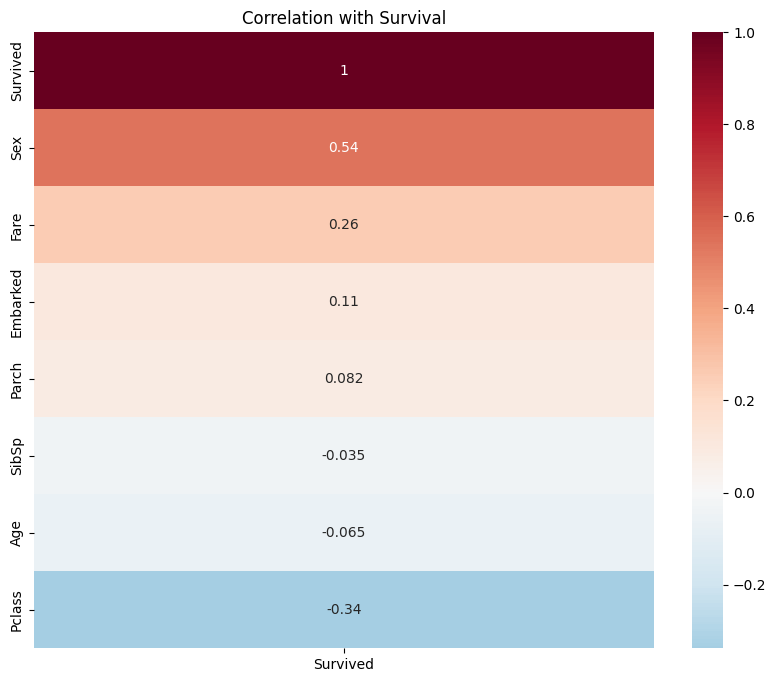

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_titanic.corr()[['Survived']].sort_values(by='Survived', ascending=False), 
            annot=True, cmap='RdBu_r', center=0)
plt.title('Correlation with Survival')
plt.show()

Linear Regression: Predicts a continuous number (e.g., a score of 85.5).

In [80]:

df['Age'] = df['Age'].fillna(df['Age'].median())


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).fillna(-1)

df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).fillna(0)


X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [81]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",-1.0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",-1.0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",-1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",-1.0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",-1.0,35.0,0,0,373450,8.0500,NaN,0.0


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(712, 7)
(712,)
(179, 7)
(179,)


In [83]:

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


predictions = lin_model.predict(X_test)


print(f"First 5 Predictions (Probability of Survival):")
print(predictions[:5])
print(f"\nMean Absolute Error: {mean_absolute_error(y_test, predictions):.2f}")

First 5 Predictions (Probability of Survival):
[0.2525829  0.41695739 0.29531841 0.64486381 0.29230248]

Mean Absolute Error: 0.39


In [84]:
from sklearn.metrics import accuracy_score

# Step 1: Convert continuous predictions to binary (0 or 1)
# We use 0.5 as the "cutoff" line
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

# Step 2: Compare with the actual survival results
accuracy = accuracy_score(y_test, binary_predictions)

print(f"Linear Regression Accuracy: {accuracy * 100:.2f}%")

Linear Regression Accuracy: 73.74%


Linear Regression Accuracy: 73.74%  i thinck i can improve it 

Random Forest with Cross-Validation

In [85]:
titanic=kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "yasserh/titanic-dataset", # Removed version number to get the latest
  file_path,
)

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
titanic.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [88]:
%pip install sklearn.cross_validation 

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sklearn.cross_validation


In [89]:
! pip install sklearn.cross_validation 

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement sklearn.cross_validation (from versions: none)
ERROR: No matching distribution found for sklearn.cross_validation


In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

siplit data 

In [91]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame called 'titanic'
# First, separate features and target
X = titanic.drop('Survived', axis=1)  # All columns except 'Survived'
y = titanic['Survived']  # The target variable

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Preserve class distribution
)

print(f"Original data shape: {titanic.shape}")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Original data shape: (891, 12)
Training features shape: (712, 11)
Testing features shape: (179, 11)
Training target shape: (712,)
Testing target shape: (179,)


In [92]:
# Check missing values in your split data
print("Missing values in X_train:")
print(pd.isnull(X_train).sum())
print("\n" + "="*50 + "\n")

print("Missing values in X_test:")
print(pd.isnull(X_test).sum())
print("\n" + "="*50 + "\n")

print("Missing values in y_train:")
print(pd.isnull(y_train).sum())
print("\n" + "="*50 + "\n")

print("Missing values in y_test:")
print(pd.isnull(y_test).sum())

Missing values in X_train:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
dtype: int64


Missing values in X_test:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             40
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          135
Embarked         0
dtype: int64


Missing values in y_train:
0


Missing values in y_test:
0


for age =medain and cabin drop it ?

In [93]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)


In [94]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [95]:
train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [96]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            40
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Survived        0
dtype: int64

In the Titanic dataset, 'Embarked' represents the port where passengers boarded:

C = Cherbourg

Q = Queenstown

S = Southampton

'S' (Southampton) is chosen because:

It's the most common embarkation port in the dataset

It's a reasonable default when data is missing

Statistical reason: 'S' has the highest frequency in the dataset

In [97]:
train['Embarked'].fillna('S',inplace=True)

In [98]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [99]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

In [100]:
df.head

<bound method NDFrame.head of       Age Embarked      Fare                                          Name  \
0     NaN        S   56.4958                                  Lam, Mr. Ali   
1     NaN        S    0.0000              Frost, Mr. Anthony Wood "Archie"   
2     NaN        S  221.7792                            Farthing, Mr. John   
3    18.0        S    9.3500                    Aks, Mrs. Sam (Leah Rosen)   
4    31.0        S   26.2500   Collyer, Mrs. Harvey (Charlotte Annie Tate)   
..    ...      ...       ...                                           ...   
886  25.0        S   26.0000  Shelley, Mrs. William (Imanita Parrish Hall)   
887  20.0        S    7.8542                    Andreasson, Mr. Paul Edvin   
888  28.0        S   10.5000                 Banfield, Mr. Frederick James   
889  23.0        C   13.7917  Jerwan, Mrs. Amin S (Marie Marthe Thuillard)   
890  31.0        S   26.2500                           Collyer, Mr. Harvey   

     Parch  PassengerId  Pclass  

In [101]:
df.shape

(891, 11)

In [102]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.096067
Parch          0.189119
PassengerId    0.036847
Pclass         0.369226
SibSp          0.308247
Survived       0.077221
Name: Age, dtype: float64

In [103]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [104]:
df.isnull().sum()

Age            177
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

In [105]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [106]:
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_size
479,31.0,S,50.4958,"Roebling, Mr. Washington Augustus II",0,868,1,male,0,0,PC 17590,1
2,NaN,S,221.7792,"Farthing, Mr. John",0,528,1,male,0,0,PC 17483,1
777,18.0,S,18.0000,"Vander Planke, Miss. Augusta Maria",0,39,3,female,2,0,345764,3
217,29.0,S,8.0500,"Christmann, Mr. Emil",0,91,3,male,0,0,343276,1
811,25.0,S,0.0000,"Tornquist, Mr. William Henry",0,272,3,male,0,1,LINE,1
33,51.0,S,12.5250,"Bateman, Rev. Robert James",0,151,2,male,0,0,S.O.P. 1166,1
185,23.0,S,7.9250,"Heininen, Miss. Wendla Maria",0,817,3,female,0,0,STON/O2. 3101290,1
260,74.0,S,7.7750,"Svensson, Mr. Johan",0,852,3,male,0,0,347060,1
864,23.0,S,263.0000,"Fortune, Miss. Mabel Helen",2,89,1,female,3,1,19950,6
617,29.0,S,21.0000,"Turpin, Mr. William John Robert",0,118,2,male,1,0,11668,2


In [107]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [108]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Family_size
0,NaN,S,56.4958,693,3,male,1,1
1,NaN,S,0.0000,482,2,male,0,1
2,NaN,S,221.7792,528,1,male,0,1
3,18.0,S,9.3500,856,3,female,1,2
4,31.0,S,26.2500,802,2,female,1,3


In [109]:
X = df.drop(columns=['Survived'])
y = df['Survived']


In [110]:
numeric_features = ['Age', 'Fare', 'Family_size', 'PassengerId']
categorical_features = ['Sex', 'Embarked', 'Pclass']


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [112]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [114]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(n_estimators=200, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=7)
}


In [115]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [116]:
results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_val_score(
        pipeline,
        X,
        y,
        cv=cv,
        scoring='accuracy'
    )

    results[name] = {
        'mean_accuracy': scores.mean(),
        'std': scores.std()
    }


In [117]:
for model, metrics in results.items():
    print(f"{model}: "
          f"{metrics['mean_accuracy']:.4f} "
          f"(± {metrics['std']:.4f})")


LogisticRegression: 0.8025 (± 0.0110)
RandomForest: 0.8193 (± 0.0234)
SVM: 0.8171 (± 0.0193)
KNN: 0.7856 (± 0.0171)


In [118]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    scores = cross_validate(
        pipeline,
        X,
        y,
        cv=cv,
        scoring=scoring
    )

    print(name)
    print("Accuracy:", scores['test_accuracy'].mean())
    print("F1:", scores['test_f1'].mean())
    print("ROC AUC:", scores['test_roc_auc'].mean())
    print('-' * 30)


LogisticRegression
Accuracy: 0.8024606113866047
F1: 0.7288266265298449
ROC AUC: 0.8502811343923289
------------------------------
RandomForest
Accuracy: 0.8193082669010107
F1: 0.752829661153729
ROC AUC: 0.8695600820376741
------------------------------
SVM
Accuracy: 0.8170610758897746
F1: 0.7441770218760239
ROC AUC: 0.8564814526456048
------------------------------
KNN
Accuracy: 0.785638064151654
F1: 0.700127460880367
ROC AUC: 0.8393569449391969
------------------------------


RandomForest performs best overall: highest Accuracy, F1, and ROC-AUC → best balance between precision and recall.

SVM is a close second: similar Accuracy and ROC-AUC, slightly weaker F1.

Logistic Regression is stable but slightly underfits: good ROC-AUC, lower F1 → misses some positives.

KNN is the weakest: lowest scores across all metrics → poor fit for this feature space.

i want to improve SVM

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', svm)
])

param_grid = {
    'model__C': [0.1, 1, 10, 50],
    'model__gamma': ['scale', 0.01, 0.1, 1],
    'model__class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)


{'model__C': 1, 'model__class_weight': 'balanced', 'model__gamma': 'scale'}
0.7675132113154461


In [120]:
svm_tuned = Pipeline([
    ('preprocessor', preprocessor),
    ('model', SVC(
        kernel='rbf',
        C=1,
        gamma='scale',
        class_weight='balanced',
        probability=True
    ))
])

# 6. Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'f1', 'roc_auc']

# 7. Cross-validated performance
scores = cross_validate(
    svm_tuned,
    X,
    y,
    cv=cv,
    scoring=scoring,
    return_train_score=False
)

print("Cross-validated metrics for tuned SVM:")
print(f"Accuracy: {scores['test_accuracy'].mean():.4f} ± {scores['test_accuracy'].std():.4f}")
print(f"F1: {scores['test_f1'].mean():.4f} ± {scores['test_f1'].std():.4f}")
print(f"ROC-AUC: {scores['test_roc_auc'].mean():.4f} ± {scores['test_roc_auc'].std():.4f}")

# 8. Train final SVM on full dataset
svm_tuned.fit(X, y)
print("Final tuned SVM trained on full dataset and ready for predictions.")

Cross-validated metrics for tuned SVM:
Accuracy: 0.8115 ± 0.0220
F1: 0.7589 ± 0.0309
ROC-AUC: 0.8540 ± 0.0293
Final tuned SVM trained on full dataset and ready for predictions.


In [121]:
y_pred = svm_tuned.predict(X)
train_accuracy = (y_pred == y).mean()
print(f"Training Accuracy on full dataset: {train_accuracy:.4f}")

Training Accuracy on full dataset: 0.8395


Metric	Before Tuning	After Tuning (SVM)
Accuracy	0.8171	0.8115 (CV mean) / 0.8395 (full training)
F1-score	0.7442	0.7589
ROC-AUC	0.8565	0.8540